## MultiClass Classification

Some algorithms such as SGD Classifiers, Random Forest Classifiers, and naive Bayes Classifiers are capable of handling multiple classes.

Others such as SVMs or Logistic Regression are strictly binary classifiers.

**OvR (one-versus the rest strategy )**

One way to create a system for detecting 10 classes, is to train 10 binary classifiers, one for each digit, and then get the decision score from every classifier for that image and identify image with the highest scoring classifier.



**OvO (one vs one)**

Train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for distinguish 0s and 2s,. If there are n classes, you need to train n x (n-1) / 2 classifiers 

Scikit Learn detects when binary classification algorithm used for a multiclass classification problem, and automatically runs either OvR or OvO, depending on the algorithm.

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist['data'], mnist['target']

In [2]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [3]:
some_image_pxs = mnist['data'].values[0]
some_image = some_image_pxs.reshape(28,-1)

Under the hood, SKlearn actually used OvO for the above SVC classifier, it trained 45 binary classifier, got their decision scores and selected the class that won most duels.

In [4]:
svm_clf.predict([some_image_pxs])

/home/nitec/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [5]:
scores_per_digits = svm_clf.decision_function([some_image_pxs])

/home/nitec/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [6]:
scores_per_digits

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [7]:
import numpy as np
np.argmax(scores_per_digits), svm_clf.classes_

(5, array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object))

In case you need to train a classifier Ovr you should use its class form

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_image_pxs])

/home/nitec/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype='<U1')

Remember that, SGD can work on Multiple Classs directly, so none of OvR or OvO was run

In [9]:
sgd_clf.decision_function([some_image_pxs])

/home/nitec/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ -9661.56965908, -22048.07168665,  -7829.77134425,
          1550.53509737, -27334.55827455,   5483.16990077,
        -24043.27516549, -24215.54666256,  -8891.68540738,
         -8752.76852579]])

In [11]:
# To evaluate the classifier cross_val_score() can be used

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8798, 0.8793, 0.8676])

The accuracy is with random method 10%, so getting % is not a bad score, but standardization or normalization boosts the accuracy.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/home/nitec/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/nitec/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90155, 0.8943 , 0.90755])

### Error Analysis

If your project were real, you explore your data, prepare data,  try out multiple models (shortlist the best ones and fine-tune hyperparameters using GridSearchCV) and automate as much as possible.

Now, assume you've found promising model, it is time for you to analyze the rror

In [13]:
#First look at confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_mt = confusion_matrix(y_train, y_train_pred)
confusion_mt

array([[5576,    0,   21,    6,    9,   43,   36,    6,  225,    1],
       [   0, 6397,   37,   23,    4,   43,    4,    6,  217,   11],
       [  27,   26, 5223,   91,   72,   25,   68,   38,  377,   11],
       [  22,   17,  116, 5232,    2,  197,   26,   40,  407,   72],
       [  10,   14,   40,   10, 5216,   11,   34,   26,  311,  170],
       [  26,   15,   30,  166,   54, 4434,   76,   17,  541,   62],
       [  30,   15,   45,    2,   44,   94, 5550,    5,  132,    1],
       [  20,    9,   51,   26,   49,   10,    3, 5705,  181,  211],
       [  17,   65,   46,   89,    3,  123,   24,   11, 5428,   45],
       [  22,   18,   30,   65,  116,   35,    1,  184,  354, 5124]])

It's better to analyze matrix as image grid

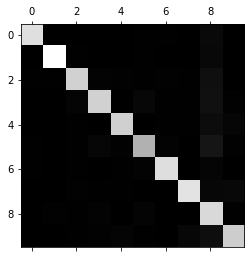

In [15]:
import matplotlib.pyplot as plt
plt.matshow(confusion_mt, cmap = plt.cm.gray)
plt.show()

To increase quality it is better divide number along in dimension

In [16]:
row_sums = confusion_mt.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_mt / row_sums

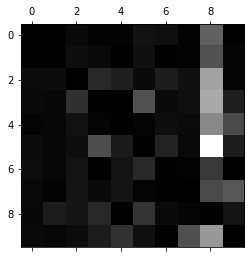

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

/tmp/ipykernel_279938/2232451361.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_aa = X_train[(y_train == cl_a) &(y_train_pred==cl_a)]
/tmp/ipykernel_279938/2232451361.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ab = X_train[(y_train == cl_a) &(y_train_pred==cl_b)]
/tmp/ipykernel_279938/2232451361.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ba = X_train[(y_train == cl_b) &(y_train_pred==cl_a)]
/tmp/ipykernel_279938/2232451361.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_bb = X_train[(y_train == cl_b) &(y_train_pred==cl_b)]


ZeroDivisionError: integer division or modulo by zero

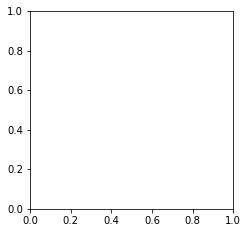

In [30]:
import matplotlib as mpl
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) &(y_train_pred==cl_a)]
X_ab = X_train[(y_train == cl_a) &(y_train_pred==cl_b)]
X_ba = X_train[(y_train == cl_b) &(y_train_pred==cl_a)]
X_bb = X_train[(y_train == cl_b) &(y_train_pred==cl_b)]
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)
plt.show()


